## Prerequisites

In [1]:
random_state = 42
random_state

42

## Otto Group Product Classification Challenge

이번 과제는 세계 최대의 전자상거래 회사 중 하나인 [Otto Group](https://www.ottogroup.com/)에서 주최하는 [Otto Group Product Classification Challenge](https://www.kaggle.com/c/otto-group-product-classification-challenge/) 경진대회에 참석해보겠습니다.

Otto Group은 익명화(anonymization)된 상품 정보에 대한 데이터를 제공하는데, 경진대회 참석자는 이 데이터를 활용하여 주어진 상품 카테고리(target)를 예측해야 합니다. 상품 카테고리는 Class_1부터 Class_9까지 총 9개가 있습니다. 주어진 데이터를 Decision Tree, Random Forest, 그리고 Gradient Boosting Machine를 활용하여 예측해보도록 하겠습니다.




In [2]:
import pandas as pd

data = pd.read_csv("data/train.csv", index_col="id")

print(data.shape)
data.head()

(61878, 94)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


## Preprocessing

In [3]:
label_name = "target"
label_name

'target'

In [4]:
feature_names = data.columns.difference([label_name])

print(len(feature_names))
feature_names

93


Index(['feat_1', 'feat_10', 'feat_11', 'feat_12', 'feat_13', 'feat_14',
       'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19', 'feat_2',
       'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25',
       'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_3', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_4', 'feat_40', 'feat_41',
       'feat_42', 'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47',
       'feat_48', 'feat_49', 'feat_5', 'feat_50', 'feat_51', 'feat_52',
       'feat_53', 'feat_54', 'feat_55', 'feat_56', 'feat_57', 'feat_58',
       'feat_59', 'feat_6', 'feat_60', 'feat_61', 'feat_62', 'feat_63',
       'feat_64', 'feat_65', 'feat_66', 'feat_67', 'feat_68', 'feat_69',
       'feat_7', 'feat_70', 'feat_71', 'feat_72', 'feat_73', 'feat_74',
       'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79', 'feat_8',
       'feat_80', 'feat_81', 'feat_82', 'feat_83', 'feat_84

In [5]:
X = data[feature_names]

print(X.shape)
X.head()

(61878, 93)


,feat_1,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_9,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,1,1,0,...,0,1,2,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,4,0,...,1,0,0,0,0,0,1,0,0,0


In [6]:
y = data[label_name]

print(y.unique())

print(y.shape)
y.head()

['Class_1' 'Class_2' 'Class_3' 'Class_4' 'Class_5' 'Class_6' 'Class_7'
 'Class_8' 'Class_9']
(61878,)


id
1    Class_1
2    Class_1
3    Class_1
4    Class_1
5    Class_1
Name: target, dtype: object

### Benchmark

### Hold-Out Validation

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(43314, 93) (43314,)
(18564, 93) (18564,)


In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

train_score = (y_train_predict == y_train).mean()
test_score = (y_test_predict == y_test).mean()

print(f"Accuracy(train) = {train_score:.6f}")
print(f"Accuracy(test) = {test_score:.6f}")

/Users/shayne.kang/.pyenv/versions/3.6.7/envs/dsschool/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy(train) = 0.993028
Accuracy(test) = 0.779412


### Hyperparameter

**n_estimators**

In [14]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = list(range(30, 301, 30))

history = []

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state=42)

    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    train_score = (y_train_predict == y_train).mean()
    test_score = (y_test_predict == y_test).mean()
    
    print(f"n_estimators = {n_estimators}, train = {train_score:.6f} test = {test_score:.6f}")
    
    history.append({
        'n_estimators': n_estimators,
        'accuracy(train)': train_score,
        'accuracy(test)': test_score,
    })

history = pd.DataFrame(history)
history.head()

n_estimators = 30, train = 0.999561 test = 0.800690
n_estimators = 60, train = 1.000000 test = 0.807746
n_estimators = 90, train = 1.000000 test = 0.809632
n_estimators = 120, train = 1.000000 test = 0.809685
n_estimators = 150, train = 1.000000 test = 0.810170
n_estimators = 180, train = 1.000000 test = 0.811409
n_estimators = 210, train = 1.000000 test = 0.811732
n_estimators = 240, train = 1.000000 test = 0.810978
n_estimators = 270, train = 1.000000 test = 0.812217
n_estimators = 300, train = 1.000000 test = 0.812217


,accuracy(test),accuracy(train),n_estimators
0,0.800690,0.999561,30
1,0.807746,1.000000,60
2,0.809632,1.000000,90
3,0.809685,1.000000,120
4,0.810170,1.000000,150


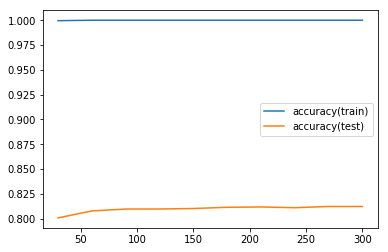

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history['n_estimators'], history['accuracy(train)'], label='accuracy(train)')
plt.plot(history['n_estimators'], history['accuracy(test)'], label='accuracy(test)')

# plt.ylim(0.0, 1.0)

plt.legend()

**max_features**

In [16]:
from sklearn.ensemble import RandomForestClassifier

max_features_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

history = []

for max_features in max_features_list:
    model = RandomForestClassifier(n_estimators = 100,
                                   max_features = max_features,
                                   random_state=42)

    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    train_score = (y_train_predict == y_train).mean()
    test_score = (y_test_predict == y_test).mean()
    
    print(f"max_features = {max_features}, train = {train_score:.6f} test = {test_score:.6f}")
    
    history.append({
        'max_features': max_features,
        'accuracy(train)': train_score,
        'accuracy(test)': test_score,
    })

history = pd.DataFrame(history)
history.head()

max_features = 0.1, train = 1.000000 test = 0.809901
max_features = 0.2, train = 1.000000 test = 0.814049
max_features = 0.3, train = 1.000000 test = 0.809524
max_features = 0.4, train = 1.000000 test = 0.811948
max_features = 0.5, train = 1.000000 test = 0.810763
max_features = 0.6, train = 1.000000 test = 0.808931
max_features = 0.7, train = 1.000000 test = 0.808985
max_features = 0.8, train = 1.000000 test = 0.804299
max_features = 0.9, train = 1.000000 test = 0.805376
max_features = 1.0, train = 1.000000 test = 0.799073


,accuracy(test),accuracy(train),max_features
0,0.809901,1.0,0.1
1,0.814049,1.0,0.2
2,0.809524,1.0,0.3
3,0.811948,1.0,0.4
4,0.810763,1.0,0.5


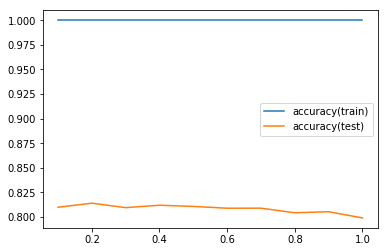

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history['max_features'], history['accuracy(train)'], label='accuracy(train)')
plt.plot(history['max_features'], history['accuracy(test)'], label='accuracy(test)')

# plt.ylim(0.0, 1.0)

plt.legend()

**class_weight**

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

model = RandomForestClassifier(n_estimators = 100,
                               class_weight = None,
                               random_state = 42)
model.fit(X_train, y_train)

y_train_predict = model.predict_proba(X_train)
y_test_predict = model.predict_proba(X_test)

train_score = log_loss(y_train, y_train_predict)
test_score = log_loss(y_test, y_test_predict)

print(f"class weight(None): train = {train_score:.6f} test = {test_score:.6f}")

model = RandomForestClassifier(n_estimators = 100,
                               class_weight = 'balanced',
                               random_state = 42)
model.fit(X_train, y_train)

y_train_predict = model.predict_proba(X_train)
y_test_predict = model.predict_proba(X_test)

train_score = log_loss(y_train, y_train_predict)
test_score = log_loss(y_test, y_test_predict)

print(f"class weight(balanced): train = {train_score:.6f} test = {test_score:.6f}")

class weight(None): train = 0.144323 test = 0.612791
class weight(balanced): train = 0.146726 test = 0.606288


### Cross Validation

In [ ]:
# Write your code here!

### Log Loss

In [ ]:
# Write your code here!